In [14]:
from imutils import build_montages
from datetime import datetime
import numpy as np
import argparse
import imutils
import cv2

In [3]:
def getOutputsNames(net):
    layersNames = net.getLayerNames()
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [4]:
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    classIds = []
    confidences = []
    boxes = []
    for out in outs:
        for deteciton in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    print(indices, 'sdfdsfsf')
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIds[i], confidences[i], left, top, left + width, top + height)
        

In [5]:
def drawPred(classIds, conf, left, top, right, bottom):
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255))
    
    label = '%.2f' % conf
    
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)
    
    labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))

In [10]:
confThreshold = 0.5
nmsThreshold = 0.4

modelCfg = '/Users/gangbacol/Desktop/Development/socket_RaspberryPi_Mac/server/model&weight/yolov3.cfg'
modelWeight = '/Users/gangbacol/Desktop/Development/socket_RaspberryPi_Mac/server/model&weight/yolov3.weights'
classesFile = '/Users/gangbacol/Desktop/Development/socket_RaspberryPi_Mac/server/model&weight/coco.names'

with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

# 사용할 모델 불러오기
print("[INFO] loading model...")
net = cv2.dnn.readNetFromDarknet(modelCfg, modelWeight)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# CONSIDER = set(["stop sign"])
# objCount = {obj: 0 for obj in CONSIDER}
# frameDict = {}

[INFO] loading model...


In [22]:
frame = cv2.imread('./IMG_6264.JPG', cv2.IMREAD_COLOR)

In [27]:
frame = imutils.resize(frame, width=400
                      )

AttributeError: 'NoneType' object has no attribute 'shape'

TypeError: Image data of dtype <U5 cannot be converted to float

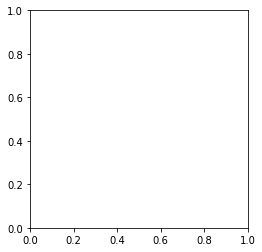

In [26]:
plt.imshow('image', frame)

In [1]:
(h, w) = frame.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (320, 320)), 1 / 255.0, (320, 320), swapRB=True, crop=False)

net.setInput(blob)
outs = net.forward(getOutputsNames(net))
outs = np.array(outs)
print(len(outs))

postprocess(frame, outs)

t, _ = net.getPerfProfile()
label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
cv2.putText(frame, label, (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))

NameError: name 'frame' is not defined

In [146]:
frameHeight = frame.shape[0]
frameWidth = frame.shape[1]
classIds = []
confidences = []
boxes = []

In [160]:
print(outs)

[array([[0.05989442, 0.03119035, 0.2609219 , ..., 0.        , 0.        ,
        0.        ],
       [0.06136799, 0.04936312, 0.2896369 , ..., 0.        , 0.        ,
        0.        ],
       [0.06714119, 0.02761823, 1.4276354 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9523431 , 0.9459233 , 0.58565503, ..., 0.        , 0.        ,
        0.        ],
       [0.9499634 , 0.9480502 , 0.4846353 , ..., 0.        , 0.        ,
        0.        ],
       [0.950284  , 0.9489749 , 1.0944498 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
 array([[0.0400806 , 0.04427338, 0.08706759, ..., 0.        , 0.        ,
        0.        ],
       [0.03527914, 0.04370797, 0.16137841, ..., 0.        , 0.        ,
        0.        ],
       [0.03857161, 0.02443116, 0.12769753, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97275794, 0.97141236, 0.05360196, ..., 0.        , 0.        ,
        0.        ],
       [0.9743789 

In [202]:
for out in outs:
    for deteciton in out:
        scores = detection[5:]
        classId = np.argmax(scores)
        confidence = scores[classId]
        print(detection[5])
        break
#         if confidence > confThreshold:
#             center_x = int(detection[0] * frameWidth)
#             center_y = int(detection[1] * frameHeight)
#             width = int(detection[2] * frameWidth)
#             height = int(detection[3] * frameHeight)
#             left = int(center_x - width / 2)
#             top = int(center_y - height / 2)
#             classIds.append(classId)
#             confidences.append(float(confidence))
#             boxes.append([left, top, width, height])

0.0
0.0
0.0


In [ ]:
indices = cv.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIds[i], confidences[i], left, top, left + width, top + height)